In [130]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [131]:
df = pd.read_csv('50_Startups.csv')
print(df.head())

         RND      ADMIN        MKT       STATE     PROFIT
0  165349.20  136897.80  471784.10    New York  192261.83
1  162597.70  151377.59  443898.53  California  191792.06
2  153441.51  101145.55  407934.54     Florida  191050.39
3  144372.41  118671.85  383199.62    New York  182901.99
4  142107.34   91391.77  366168.42     Florida  166187.94


In [132]:
print(df.isnull().sum())

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64


In [133]:
X = df[['PROFIT']]

In [134]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

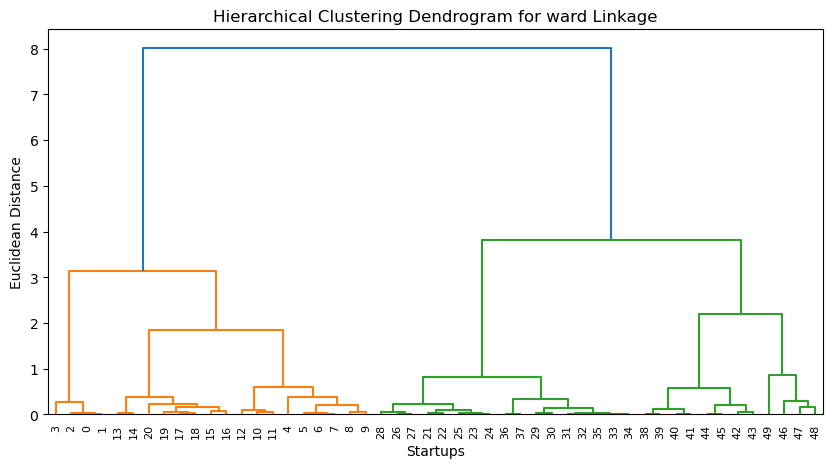

        RND      ADMIN        MKT       STATE    PROFIT  Cluster
45  1000.23  124153.04    1903.93    New York  64926.08        1
46  1315.46  115816.21  297114.46     Florida  49490.75        1
47     0.00  135426.92       0.00  California  42559.73        1
48   542.05   51743.15       0.00    New York  35673.41        1
49     0.00  116983.80   45173.06  California  14681.40        1


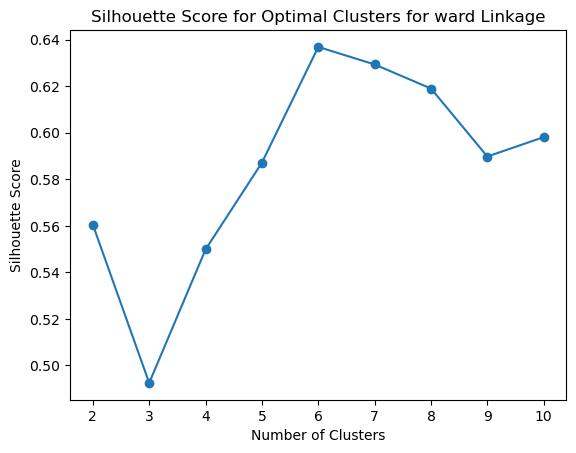

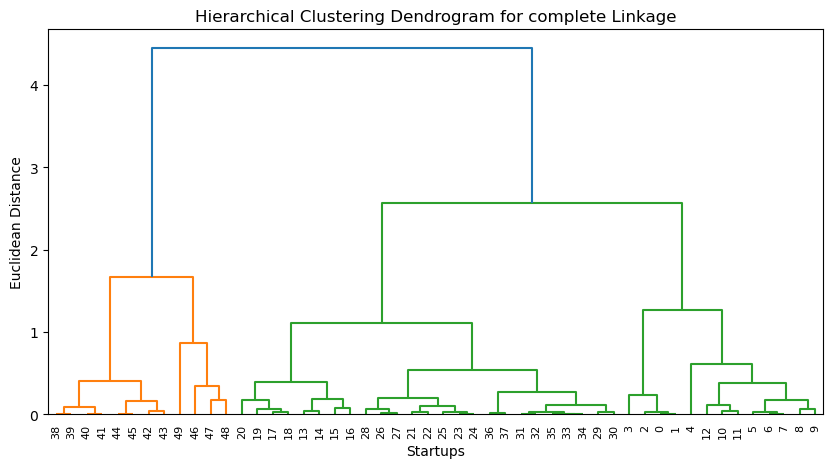

        RND      ADMIN        MKT       STATE    PROFIT  Cluster
45  1000.23  124153.04    1903.93    New York  64926.08        0
46  1315.46  115816.21  297114.46     Florida  49490.75        0
47     0.00  135426.92       0.00  California  42559.73        0
48   542.05   51743.15       0.00    New York  35673.41        0
49     0.00  116983.80   45173.06  California  14681.40        0


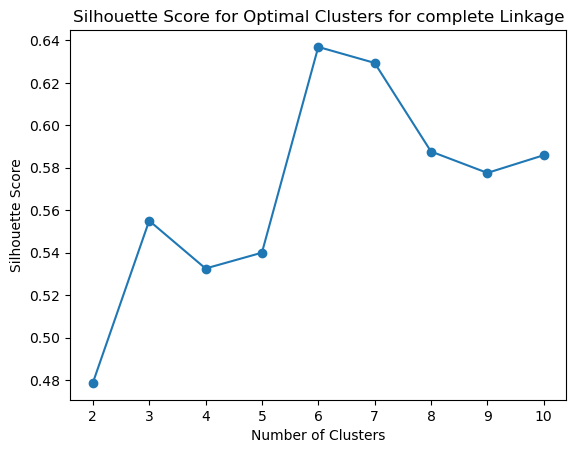

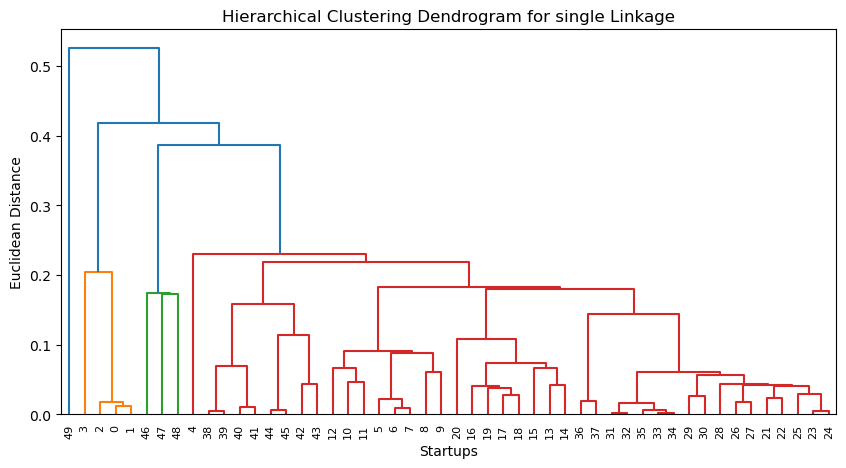

        RND      ADMIN        MKT       STATE    PROFIT  Cluster
45  1000.23  124153.04    1903.93    New York  64926.08        0
46  1315.46  115816.21  297114.46     Florida  49490.75        0
47     0.00  135426.92       0.00  California  42559.73        0
48   542.05   51743.15       0.00    New York  35673.41        0
49     0.00  116983.80   45173.06  California  14681.40        1


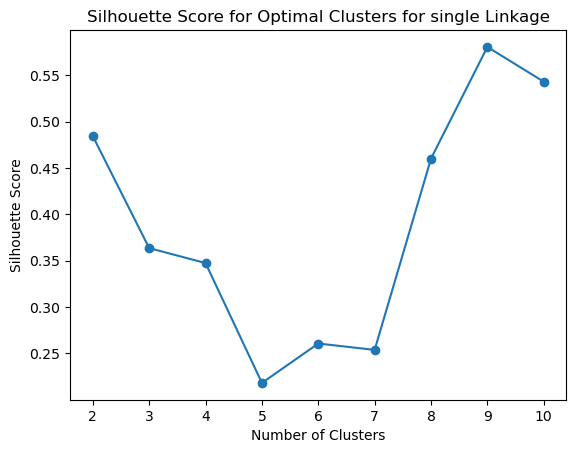

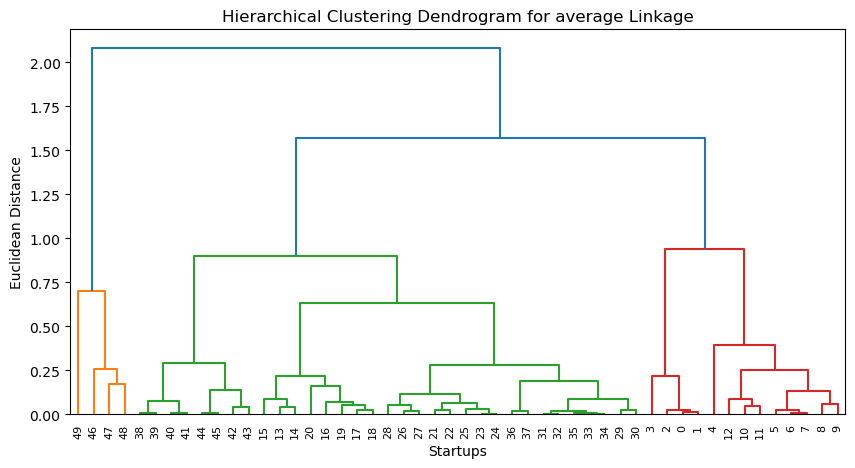

        RND      ADMIN        MKT       STATE    PROFIT  Cluster
45  1000.23  124153.04    1903.93    New York  64926.08        2
46  1315.46  115816.21  297114.46     Florida  49490.75        1
47     0.00  135426.92       0.00  California  42559.73        1
48   542.05   51743.15       0.00    New York  35673.41        1
49     0.00  116983.80   45173.06  California  14681.40        1


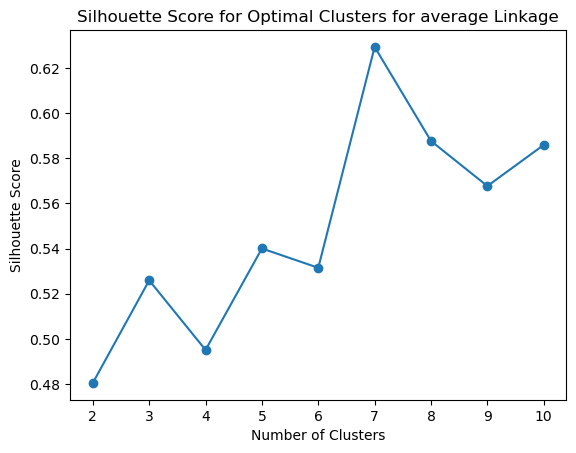

In [135]:
from sklearn.metrics import silhouette_score
r = ['ward','complete','single','average']
for l in r :
    hierarchical_cluster = AgglomerativeClustering(metric='euclidean', linkage=l)
    df['Cluster'] = hierarchical_cluster.fit_predict(X_scaled)
    plt.figure(figsize=(10, 5))
    dendrogram(linkage(X_scaled, method=l))
    plt.title(f'Hierarchical Clustering Dendrogram for {l} Linkage')
    plt.xlabel('Startups')
    plt.ylabel('Euclidean Distance')
    plt.show()
    print(df.tail())
    df.drop('Cluster',axis='columns')
    res = []
    distance_metric = 'euclidean'
    for n_clusters in range(2, 11):
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage=l, metric=distance_metric)
        labels = model.fit_predict(XN)
        res.append(silhouette_score(XN, labels))
    plt.plot(range(2, 11), res, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title(f'Silhouette Score for Optimal Clusters for {l} Linkage')
    plt.show()